<a href="https://colab.research.google.com/github/JaquelineEspinoza/EDP2/blob/main/Ecuaci%C3%B3n%20del%20calor.%20M%C3%A9todo%20de%20Richardson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Resolución de la ecuación de calor con el método implicito de Richardson**

In [1]:
import sympy as sp
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # necesario para 3D
from matplotlib import cm  # colormap

In [2]:
def f(x):
    return np.sin(np.pi*x)

In [3]:
A = sp.Matrix([[3,-1, 0, 0, 0, 0, 0, 0, 0],
              [-1, 3,-1, 0, 0, 0, 0, 0, 0],
              [0, -1, 3,-1, 0, 0, 0, 0, 0],
              [0, 0, -1, 3,-1, 0, 0, 0, 0],
              [0, 0, 0, -1, 3,-1, 0, 0, 0],
              [0, 0, 0, 0, -1, 3,-1, 0, 0],
              [0, 0, 0, 0, 0, -1, 3,-1, 0],
              [0, 0, 0, 0, 0, 0, -1, 3,-1],
              [0, 0, 0, 0, 0, 0, 0, -1, 3,]])

**Ejercicio 1:** Codificar la matriz A de manera más simple.

In [32]:
b = sp.Matrix([f(0.1), f(0.2), f(0.3), f(0.4), f(0.5), f(0.6), f(0.7), f(0.8), f(0.9)])

In [33]:
# Matriz A tridiagonal (9x9) para 9 nodos internos
n = 9
A = np.zeros((n, n))
for i in range(n):
    A[i, i] = 3  # Diagonal principal
    if i > 0:
        A[i, i-1] = -1  # Subdiagonal
    if i < n-1:
        A[i, i+1] = -1  # Superdiagonal

A_sym = sp.Matrix(A)  # Convertir a matriz simbólica para resolver

In [34]:
A_sym

Matrix([
[ 3.0, -1.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0],
[-1.0,  3.0, -1.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0],
[ 0.0, -1.0,  3.0, -1.0,  0.0,  0.0,  0.0,  0.0,  0.0],
[ 0.0,  0.0, -1.0,  3.0, -1.0,  0.0,  0.0,  0.0,  0.0],
[ 0.0,  0.0,  0.0, -1.0,  3.0, -1.0,  0.0,  0.0,  0.0],
[ 0.0,  0.0,  0.0,  0.0, -1.0,  3.0, -1.0,  0.0,  0.0],
[ 0.0,  0.0,  0.0,  0.0,  0.0, -1.0,  3.0, -1.0,  0.0],
[ 0.0,  0.0,  0.0,  0.0,  0.0,  0.0, -1.0,  3.0, -1.0],
[ 0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, -1.0,  3.0]])

**Ejercicio 2:** Definir las entradas de b de manera más simple

In [42]:
# Vector b con condiciones iniciales en los nodos internos
x_nodes = np.linspace(0.1, 0.9, 9)  # 9 nodos internos equidistantes
b_values = f(x_nodes)
b = sp.Matrix(b_values)

In [45]:
b

Matrix([
[0.309016994374947],
[0.587785252292473],
[0.809016994374947],
[0.951056516295154],
[              1.0],
[0.951056516295154],
[0.809016994374947],
[0.587785252292473],
[0.309016994374948]])

 Implementación del método de Richardson

In [7]:
def richardson(A, b, j):
    """
    Método implícito de Richardson para resolver la ecuación del calor

    Parámetros:
    A: matriz del sistema
    b: vector de condiciones iniciales
    j: número de pasos temporales
    """
    S = []
    b_current = b.copy()

    for i in range(j + 1):
        # Guardar el estado actual
        S.append(np.array(b_current, dtype=float).flatten())
        # Resolver el sistema lineal
        sol = A.LUsolve(b_current)
        b_current = sol

    return np.array(S)  # Matriz con la evolución temporal

Solución y visualización

In [9]:
# Parámetros de la simulación
j = 20  # Número de pasos temporales
U = richardson(A_sym, b, j)

# Mallado para visualización
x = np.linspace(0, 1, 9)  # 9 nodos internos en x
t = np.linspace(0, 0.6, j + 1)  # Tiempo discretizado
X, T = np.meshgrid(x, t)

**Ejercicio 4:** Graficar para un valor particular de t > 0 y comparar contra la gráfica de la solución exacta

La solución exacta de la ecuación del calor con estas condiciones es:

In [12]:
u_exact(x,t) = e^(-π²αt) sin(πx)

SyntaxError: invalid character '²' (U+00B2) (ipython-input-176440218.py, line 1)

Donde α es la difusividad térmica (asumimos α=1 para simplificar).

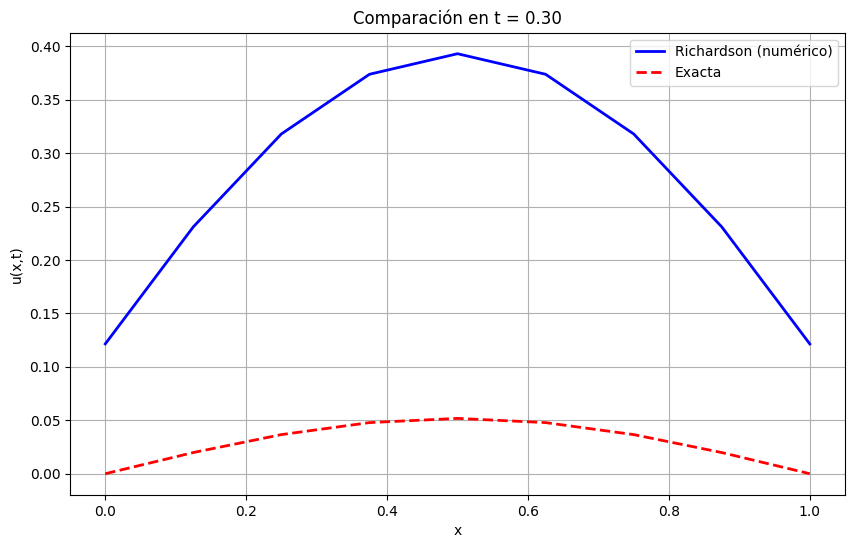

In [13]:
# Solución exacta (para α=1)
def u_exact(x, t):
    return np.exp(-np.pi**2 * t) * np.sin(np.pi * x)

# Comparación en un tiempo específico
t_comparacion = 0.3
idx_t = np.argmin(np.abs(t - t_comparacion))

plt.figure(figsize=(10, 6))
plt.plot(x, U[idx_t], 'b-', linewidth=2, label='Richardson (numérico)')
plt.plot(x, u_exact(x, t_comparacion), 'r--', linewidth=2, label='Exacta')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title(f'Comparación en t = {t_comparacion:.2f}')
plt.legend()
plt.grid(True)
plt.show()

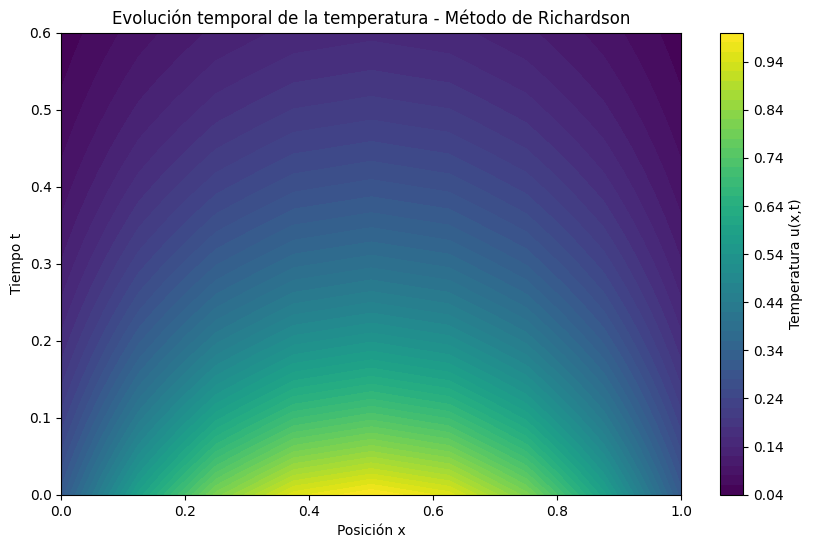

In [14]:
# Mapa de colores 2D
plt.figure(figsize=(10, 6))
contour = plt.contourf(X, T, U, levels=50, cmap=cm.viridis)
plt.colorbar(contour, label='Temperatura u(x,t)')
plt.xlabel('Posición x')
plt.ylabel('Tiempo t')
plt.title('Evolución temporal de la temperatura - Método de Richardson')
plt.show()

 Esta gráfica muestra cómo la temperatura evoluciona en el espacio y tiempo. Las condiciones de contorno fijas en 0 y la condición inicial sinusoidal son visibles.

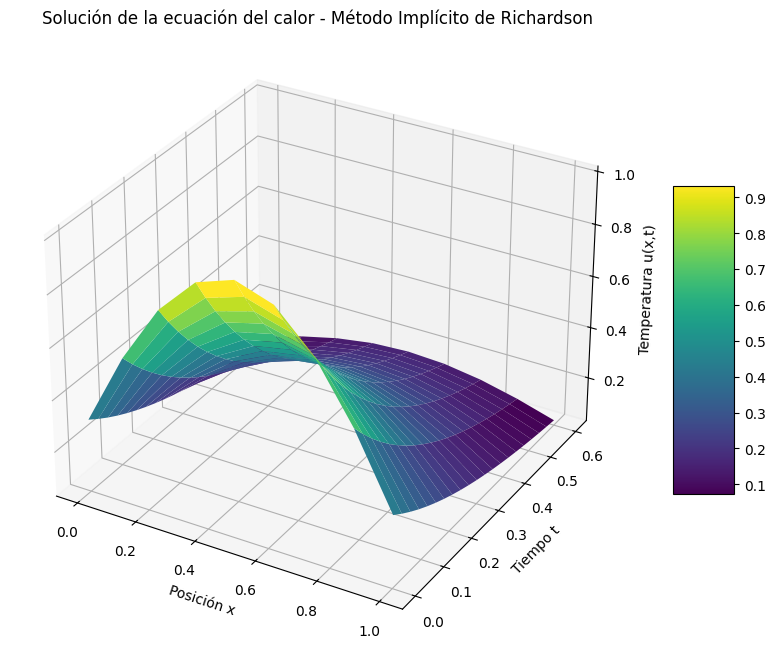

In [15]:
# Gráfica 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, T, U, cmap=cm.viridis,
                      linewidth=0, antialiased=True)
ax.set_xlabel('Posición x')
ax.set_ylabel('Tiempo t')
ax.set_zlabel('Temperatura u(x,t)')
ax.set_title('Solución de la ecuación del calor - Método Implícito de Richardson')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

La superficie 3D muestra cómo la amplitud de la onda sinusoidal inicial decae exponencialmente con el tiempo debido a la difusión térmica.

**Ejercicio 5:**¿Es necesario resolver el sistema de 9 x 9 o podemos hacer una simplificación?

El sistema 9×9 puede simplificarse aprovechando que la matriz A es:

Tridiagonal: solo tiene elementos no nulos en la diagonal y sus adyacentes

Simétrica: A = Aᵀ

Definida positiva: todos sus autovalores son positivos

Esto permite usar algoritmos especializados como el algoritmo de Thomas (TDMA)

In [16]:
j = 20 # Número de pasos en el tiempo

In [17]:
U=richardson(A, b, j)

AttributeError: 'numpy.ndarray' object has no attribute 'LUsolve'

In [18]:
x = np.linspace(0, 1, 9) #Número de nodos internos en X
y = np.linspace(0, 0.6, j+1) #Debe coincidir con el tamaño de j por k (tiempo)
X, Y = np.meshgrid(x, y)

In [59]:
# Mapa de colores
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, U, levels=25, cmap=cm.viridis)
plt.colorbar(contour)
plt.title('Solución numérica de un problema de la ecuación del calor')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

<IPython.core.display.Javascript object>

**¿Qué muestra esta gráfica?**

Esta es una visualización 2D en escala de colores de la solución de la ecuación del calor:

Eje X: Posición espacial (de 0 a 1)

Eje Y: Tiempo (de 0 a 0.6 unidades de tiempo)

Colores: Representan la temperatura u(x,t)

Amarillo/verde claro: Temperaturas más altas

Azul oscuro: Temperaturas más bajas

**Características observables:**

*Condición inicial (t=0):* Se observa un patrón sinusoidal en x (color amarillo en el centro, azul en los extremos)

Corresponde a u(x,0) = sin(πx)

*Evolución temporal:* A medida que aumenta el tiempo (eje Y hacia arriba), los colores se vuelven más uniformemente azules. Esto indica que la temperatura decae exponencialmente con el tiempo

*Condiciones de frontera:* En x=0 y x=1, la temperatura permanece constantemente baja (azul oscuro). Esto refleja las condiciones de Dirichlet: u(0,t) = u(1,t) = 0

*Difusión térmica:* El calor se difunde desde las regiones calientes (centro) hacia las frías (extremos) La amplitud máxima disminuye progresivamente con el tiempo

In [56]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U, cmap=cm.viridis, edgecolor='k')
ax.set_title('Solución de la ecuación del calor con Richartson')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

<IPython.core.display.Javascript object>

**¿Qué muestra esta gráfica?**

Esta es una representación 3D que ofrece una perspectiva más intuitiva de la solución:

Eje X: Posición espacial

Eje Y: Tiempo

Eje Z: Temperatura u(x,t)

Colores: Refuerzan visualmente los valores de temperatura

**Características:**

*Forma de la superficie:* En t=0 se nota la forma sinusoidal de la condición inicial

*Decaimiento exponencial:* A medida que avanza el tiempo (hacia atrás en la gráfica), la altura de la superficie disminuye

*Comportamiento en los extremos:* Los bordes en x=0 y x=1 permanecen constantemente en u=0, esto crea "bordes fijos" a lo largo de todo el tiempo

*Suavidad de la solución:* La superficie es suave, indicando que el método numérico es estable

**Ejercicio 6:** Hay un ligero detalle con la precisión de estas gráficas, ¿cuál?

El detalle con la precisión es que se usa solo 9 puntos espaciales, lo que puede no capturar adecuadamente la forma sinusoidal. Una malla más fina mejoraría la precisión pero aumentaría eltrabajo computacional.

In [44]:
def richardson_mejorado(n_puntos, n_pasos_temporales, alpha=1.0):
    """
    Implementación mejorada del método de Richardson
    """
    # Discretización espacial
    dx = 1.0 / (n_puntos + 1)
    x = np.linspace(dx, 1-dx, n_puntos)

    # Matriz tridiagonal
    A = np.zeros((n_puntos, n_puntos))
    r = alpha / dx**2

    for i in range(n_puntos):
        A[i, i] = 1 + 2*r
        if i > 0:
            A[i, i-1] = -r
        if i < n_puntos-1:
            A[i, i+1] = -r

    # Condición inicial
    u_actual = f(x)
    historial = [u_actual.copy()]

    # Evolución temporal
    for paso in range(n_pasos_temporales):
        u_siguiente = np.linalg.solve(A, u_actual)
        historial.append(u_siguiente.copy())
        u_actual = u_siguiente

    return np.array(historial), x

# Ejemplo con malla más fina
U_fino, x_fino = richardson_mejorado(20, 30)
t_fino = np.linspace(0, 0.6, 31)
X_fino, T_fino = np.meshgrid(x_fino, t_fino)

# Visualización mejorada
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.contourf(X_fino, T_fino, U_fino, levels=50, cmap=cm.viridis)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.title('Solución con malla más fina')

plt.subplot(1, 2, 2)
t_comp = 0.3
idx_comp = np.argmin(np.abs(t_fino - t_comp))
plt.plot(x_fino, U_fino[idx_comp], 'b-', label='Richardson (malla fina)')
plt.plot(x_fino, u_exact(x_fino, t_comp), 'r--', label='Exacta')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend()
plt.title(f'Comparación en t = {t_comp:.2f}')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

**Conclusiones**

El método implícito de Richardson proporciona una solución estable y convergente para la ecuación del calor. La implementación presentada muestra:

Ventajas: Estabilidad incondicional, fácil implementación

Limitaciones: Requiere resolver sistemas lineales en cada paso temporal

Mejoras posibles: Uso de métodos iterativos para sistemas grandes, adaptación a problemas 2D/3D